# Lead Scoring Case Study

## <a id="32">1. Introduction and Objective of the Case Study</a>


#### Problem Statement
<b>X Education</b>  is an education company, that sells online courses to industry professionals. 
The company markets its courses on several websites and search engines like Google. Professionals, interested in the courses,  land on their website and might browse the courses or fill up a form for the course or watch some videos. Any people wo fills up a form providing theis/her email address or phone number, is classified as a lead to the company. Moreover, the company also gets leads through past referrals. Once these leads are acquired, the Sales Team employees reach out to these leads, through phone calls, emails etc. Through this process, some of the leads get converted into actual paying customers. 

<i>The typical lead conversion rate at X education is around <b>30%</b>.</i>

Inspite of a lot of leads being generated in the initial stage, only a few of them get converted. In the intermediate stage, the potential leads need to be nurtured well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

The <b>purpose of this case study is <i>to identify the most promising leads </b>, i.e. the leads that are most likely to convert into paying customers.</i>

We need to build a model wherein a lead score is assigned to each of the leads, so that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. 

<i><u>The ballpark of the target lead conversion rate has been set to be around 80%, by the CEO.</u></i>


## <a id="32">2. Import important libraries and other preliminary settings for EDA</a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Setting the options to display max rows and max columns:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 800)

#Setting the options to convert scientific notations such as 4.225108e+11 to 422510842796.00
pd.options.display.float_format = '{:.4f}'.format 

## <a id="32">3. Read the data and create dataframe</a>

In [4]:
#reading the data dictionary first to understand the variables
dict = pd.read_excel("Leads Data Dictionary.xlsx")
dict.head(100)

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,nan,Variables,Description
1,nan,Prospect ID,A unique ID with which the customer is identified.
2,nan,Lead Number,A lead number assigned to each lead procured.
3,nan,Lead Origin,"The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc."
4,nan,Lead Source,"The source of the lead. Includes Google, Organic Search, Olark Chat, etc."
5,nan,Do Not Email,An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.
6,nan,Do Not Call,An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.
7,nan,Converted,The target variable. Indicates whether a lead has been successfully converted or not.
8,nan,TotalVisits,The total number of visits made by the customer on the website.
9,nan,Total Time Spent on Website,The total time spent by the customer on the website.


In [5]:
#reading the lead data
leads=pd.read_csv("Leads.csv")
print ("Data read into a pandas 'leads' dataframe!")

Data read into a pandas 'leads' dataframe!


In [6]:
#read 5 rows of df
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0000,0,0.0000,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0000,15.0000,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0000,674,2.5000,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0000,15.0000,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0000,1532,2.0000,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0000,20.0000,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0000,305,1.0000,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0000,17.0000,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0000,1428,1.0000,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0000,18.0000,No,No,Modified


In [7]:
#check the shape
leads.shape

(9240, 37)

In [8]:
#check dataframe for missing data and datatypes 
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

<div class="alert alert-block alert-info">
    There are multiple columns with missing values.<br>
    <i>We need to review them and  treat the missing data in Data Cleaning phase.</i>
</div> 

In [9]:
#check the details of numerical data
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.0000,9240.0000,9103.0000,9240.0000,9103.0000,5022.0000,5022.0000
mean,617188.4356,0.3854,3.4452,487.6983,2.3628,14.3063,16.3449
std,23405.9957,0.4867,4.8549,548.0215,2.1614,1.3867,1.8114
min,579533.0000,0.0000,0.0000,0.0000,0.0000,7.0000,11.0000
25%,596484.5000,0.0000,1.0000,12.0000,1.0000,14.0000,15.0000
50%,615479.0000,0.0000,3.0000,248.0000,2.0000,14.0000,16.0000
75%,637387.2500,1.0000,5.0000,936.0000,3.0000,15.0000,18.0000
max,660737.0000,1.0000,251.0000,2272.0000,55.0000,18.0000,20.0000


## <a id="32">4. Exploratory Data Analysis</a>
<h4><font color = purple > 4.1 Data Cleaning and Treatment</font></h4>

In [10]:
#check for duplicates
sum(leads.duplicated(subset = 'Prospect ID')) == 0

True

In [11]:
#check for duplicates
sum(leads.duplicated(subset = 'Lead Number')) == 0

True

<div class="alert alert-block alert-info"><b>Inference</b><br>
    There are no duplicate values for 'Prospect ID' and 'Lead Number'
</div>

In [12]:
#dropping Lead Number and Prospect ID since they have all unique values

leads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [13]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0000,0,0.0000,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0000,15.0000,No,No,Modified
1,API,Organic Search,No,No,0,5.0000,674,2.5000,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0000,15.0000,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0000,1532,2.0000,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0000,20.0000,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0000,305,1.0000,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0000,17.0000,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0000,1428,1.0000,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0000,18.0000,No,No,Modified


In [14]:
# There are 'Select' values for many columns. This seems to be because the customer did not select any option from the list.
# Identify the columns with 'Select' values

cols=list(leads.columns)
test=['Select']
text=[]
for i in range(len(cols)):
    if len(leads[cols[i]].isin(test).unique())>1:
        text.append(cols[i])
print(text)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [15]:
# Since these 'Select' values are as good as NULL, converting them to NaN
leads[text] = leads[text].replace('Select', np.nan)

In [16]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0000,0,0.0000,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0000,15.0000,No,No,Modified
1,API,Organic Search,No,No,0,5.0000,674,2.5000,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0000,15.0000,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0000,1532,2.0000,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0000,20.0000,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0000,305,1.0000,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0000,17.0000,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0000,1428,1.0000,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0000,18.0000,No,No,Modified


In [17]:
#checking null values in each column

leads.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [18]:
#checking percentage of null values in each column

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                      0.0000
Lead Source                                      0.3900
Do Not Email                                     0.0000
Do Not Call                                      0.0000
Converted                                        0.0000
TotalVisits                                      1.4800
Total Time Spent on Website                      0.0000
Page Views Per Visit                             1.4800
Last Activity                                    1.1100
Country                                         26.6300
Specialization                                  36.5800
How did you hear about X Education              78.4600
What is your current occupation                 29.1100
What matters most to you in choosing a course   29.3200
Search                                           0.0000
Magazine                                         0.0000
Newspaper Article                                0.0000
X Education Forums                              

In [19]:
#dropping columns with more than 40% missing values

cols=leads.columns

for i in cols:
    if((100*(leads[i].isnull().sum()/len(leads.index))) >= 40):
        leads.drop(i, 1, inplace = True)

In [20]:
#re-checking percentage of null values in each column

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                      0.0000
Lead Source                                      0.3900
Do Not Email                                     0.0000
Do Not Call                                      0.0000
Converted                                        0.0000
TotalVisits                                      1.4800
Total Time Spent on Website                      0.0000
Page Views Per Visit                             1.4800
Last Activity                                    1.1100
Country                                         26.6300
Specialization                                  36.5800
What is your current occupation                 29.1100
What matters most to you in choosing a course   29.3200
Search                                           0.0000
Magazine                                         0.0000
Newspaper Article                                0.0000
X Education Forums                               0.0000
Newspaper                                       


<h4><font color = purple > 4.2 Categorical Attribute Analysis</font></h4>

In [21]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   5860 non-null object
What is your current occupation                  6550 non-null object
What matters most to you in choosing a course    6531

In [22]:
#checking value counts of Country column

leads['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Nigeria                    4
Germany                    4
South Africa               4
Canada                     4
Kuwait                     4
Sweden                     3
Philippines                2
Italy                      2
Uganda                     2
China                      2
Asia/Pacific Region        2
Belgium                    2
Ghana                      2
Bangladesh                 2
Netherlands                2
Switzerland                1
Malaysia                   1
Vietnam                    1
Sri Lanka                  1
Tanzania                   1
Kenya         

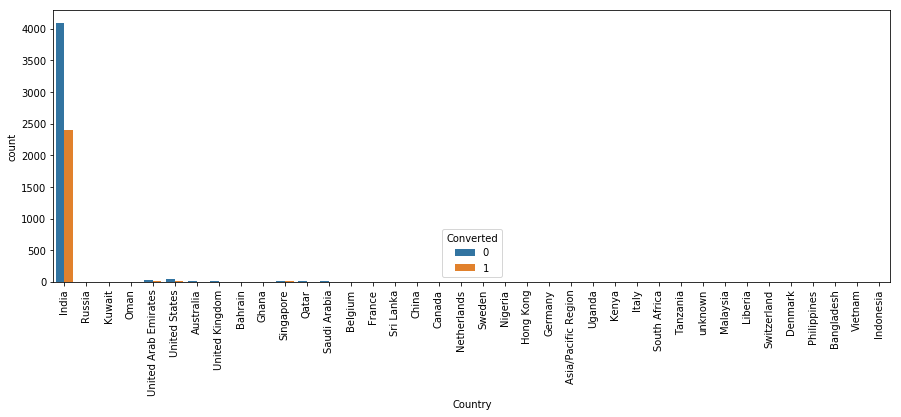

In [23]:
#plotting spread of Country columnn 
plt.figure(figsize=(15,5))
s1=sns.countplot(leads.Country, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [24]:
# check the percentage of India as value in the country column

country_percentage = round(100*len(leads[leads['Country'] == 'India'])/len(leads['Country']),2)
print(country_percentage)

70.26


In [25]:
# Since 70% of the lead data comes from the country 'India' and a significant 27% of the records has missing values for Country detail, 
# we shall go ahead and drop the column

leads = leads.drop(['Country'], axis=1)

In [26]:
leads.shape

(9240, 27)

In [27]:
#checking value counts of "City" column

leads['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [28]:
# replacing the null values with Mumbai as city.

leads['City'] = leads['City'].replace(np.nan,'Mumbai')

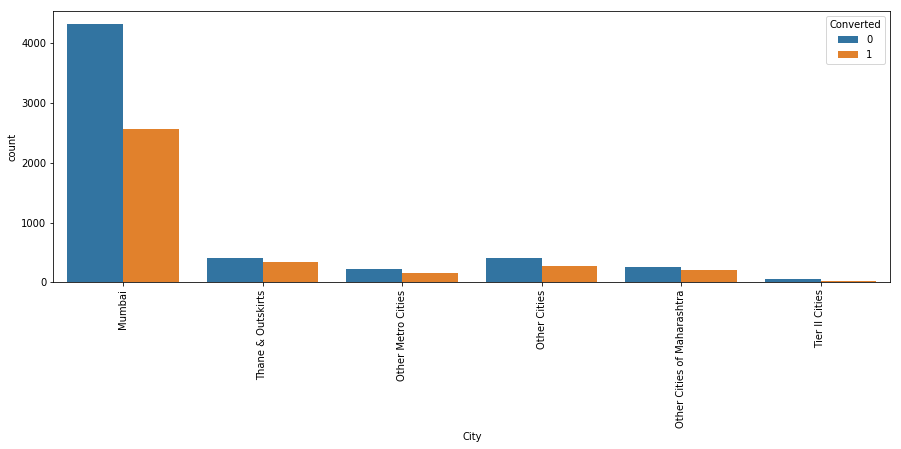

In [29]:
#plotting spread of Country columnn 
plt.figure(figsize=(15,5))
s1=sns.countplot(leads.City, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [30]:
# check the percentage of India as value in the City column

city_percentage = round(100*len(leads[leads['City'] == 'Mumbai'])/len(leads['City']),2)
print(city_percentage)

74.58


In [31]:
# Since "Mumbai" occurs around 75% of times in the City column. 
# we shall go ahead and drop the column.

leads = leads.drop(['City'], axis=1)

In [32]:
#checking value counts of Specialization column

leads['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [33]:
# Some leads may not have mentioned specialization because it was not in the list of options, or maybe they are students 
#and don't have a specialization yet. So we will replace NaN values here with 'Not Specified'

leads['Specialization'] = leads['Specialization'].fillna('Not Specified')

In [34]:
leads['Specialization'].value_counts(dropna=False)

Not Specified                        3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

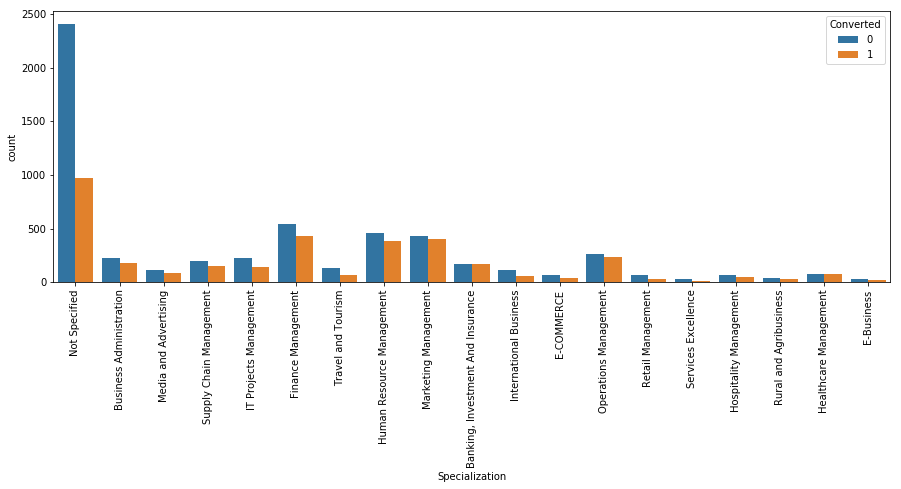

In [35]:
#plotting spread of Specialization columnn 

plt.figure(figsize=(15,5))
s1=sns.countplot(leads.Specialization, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [36]:
#combining all the Management related Specializations under Management_Specializations bucket

leads['Specialization']=leads['Specialization'].replace(['Finance Management','Human Resource Management',
'Marketing Management','Operations Management','IT Projects Management','Supply Chain Management',
'Healthcare Management','Hospitality Management', 'Retail Management'] ,'Management_Specializations') 

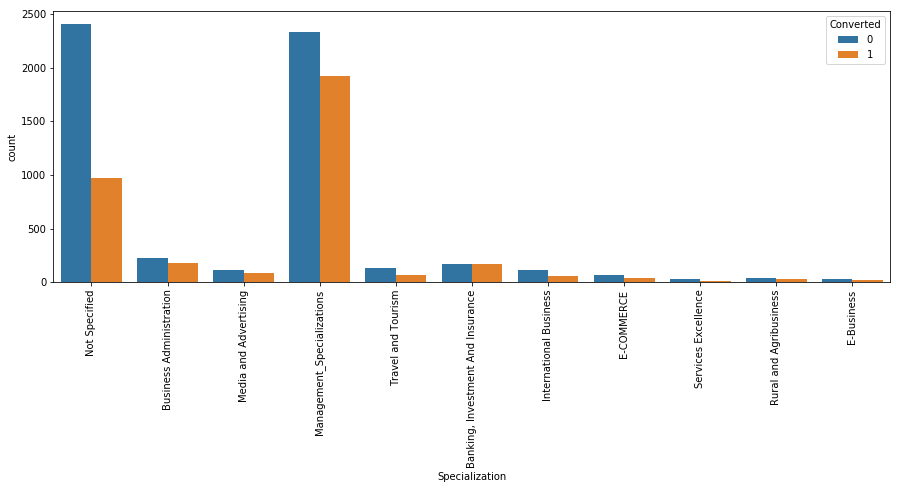

In [37]:
#visualizing Converted vs Not-Converted leads fro each specialization

plt.figure(figsize=(15,5))
s1=sns.countplot(leads.Specialization, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

 <div class="alert alert-block alert-info"><b>Inference</b><br>
    <li>A major section of leads have not specified the specialization. This may imply that the company is mostly being able to reach to customers who have no or bare minimum work domain knowledge.</li>
    <li>It may also imply that the other domains are not available in the options provided in th eform. Company may itself need to expand its options in other domains a</li>
    <li>Out of the specializations mentioned, a major percentage of leads come from Management sector and their conversion rate is quite high, but yet not as much as non-conversion. Comnpany may focus on this domain and try to apply better marketing stretegies to convince learners from Manangement related domain</li>
    <li>Banking, Investment and Assurance has a very minimum percentage of leads but the conversion rate among them is very high. Company can try to reach out to more people from this domain.</li>
    
</div>

In [38]:
#Inspecting data from 'What is your current occupation' column

leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [39]:
# Lead may not have mentioned 'What is your current occupation' because it was not in the list or maybe they are 
# Unemployed. So we will replace NaN values here with 'Not Specified'

leads['What is your current occupation'] = leads['What is your current occupation'].fillna('Not Specified')

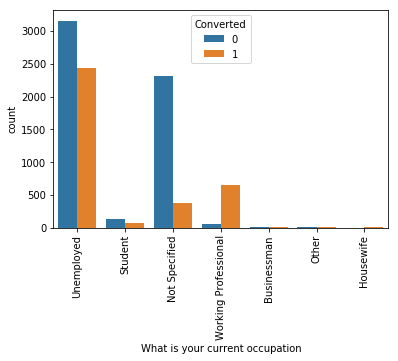

In [40]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(leads['What is your current occupation'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

<div class="alert alert-block alert-info"><b>Inference</b><br>
    <li>Working Professionals going for the course have high chances of joining it..</li>
    <li>The highest number of leads are acquired from the Unemployed section, but their conversion rate needs to be significantly improved. Company can think of implementing promotional offers and discounts to engage the Unemployed and get them converted</li>
    
</div>

In [41]:
#checking data for 'What matters most to you in choosing a course'

leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

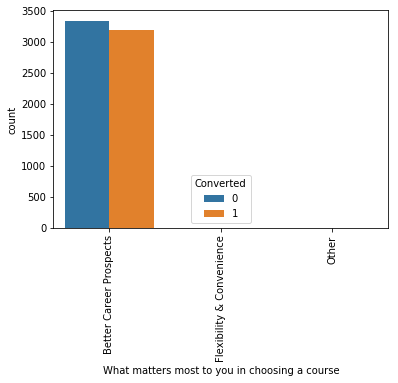

In [42]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(leads['What matters most to you in choosing a course'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [43]:
# check the percentage of Better Career Prospects  as value in the 'What matters most to you in choosing a course' column

course_percentage = round(100*len(leads[leads['What matters most to you in choosing a course'] == 'Better Career Prospects'])/len(leads['What matters most to you in choosing a course']),2)
print(course_percentage)

70.65


<div class="alert alert-block alert-info"><b>Inference</b><br>
    <li>A major 71 % of leads arelooking for a better job prspect, whereas a significant 29% of leads havenot specified anything at all. The job market being so volatile and competitive, the company can strategise to tie up with companies and promote job placement help features </li>
    
</div>

In [44]:
# Since "Better Career Prospects" occurs around 70% of times in the column, and also has around 29% as missing values, 
# we shall go ahead and drop the column

leads = leads.drop(['What matters most to you in choosing a course'], axis=1)

In [45]:
#checking value counts of Tag variable
leads['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [46]:
#replacing Nan values with "Not Specified"
leads['Tags'] = leads['Tags'].replace(np.nan,'Not Specified')

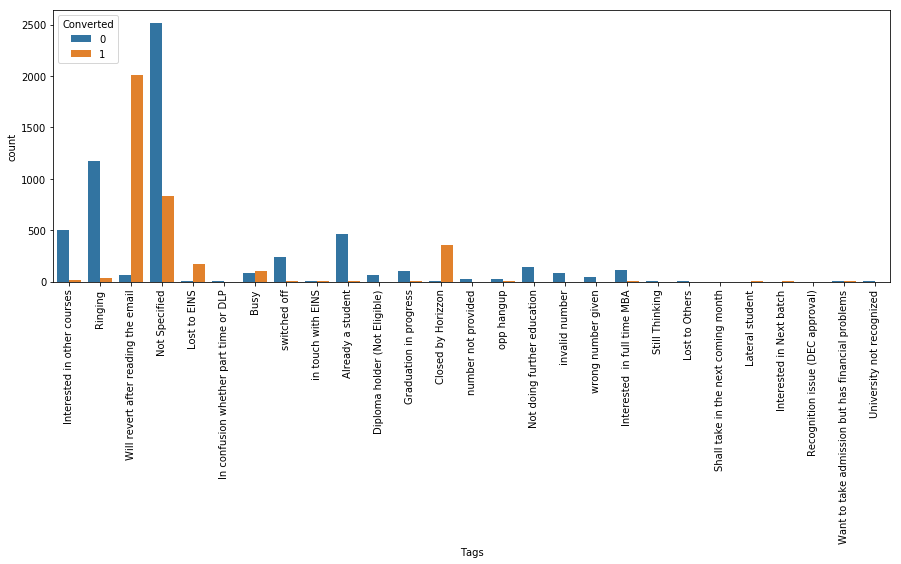

In [47]:
#visualizing Converted vs Non-converted leads per Tag

plt.figure(figsize=(15,5))
s1=sns.countplot(leads['Tags'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [48]:
#replacing tags with low frequency with "Other Tags"

leads['Tags'] = leads['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

leads['Tags'] = leads['Tags'].replace(['switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'] , 'Other_Tags')

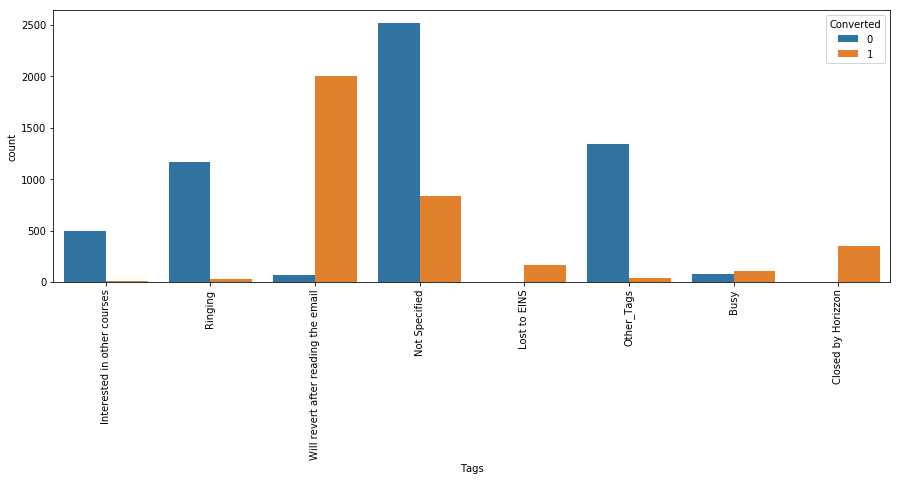

In [49]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))
s1=sns.countplot(leads['Tags'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

<div class="alert alert-block alert-info"><b>Inference</b>
<br><li>Leads who committed to revert after reading the email, have a very successful conversion rate, with mostly around 95% of the leads being actually converted to paying customers. Email may be a preferred way of communicatio nof the offers and courses by the company </li>
    <li>'Lost to EINs' and 'Closed by Horizzon' tags have very less number of leads but outof those, almost all converted. Company can focus on those channels </li>
    
</div>

In [50]:
#checking percentage of missing values
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                0.0000
Lead Source                                0.3900
Do Not Email                               0.0000
Do Not Call                                0.0000
Converted                                  0.0000
TotalVisits                                1.4800
Total Time Spent on Website                0.0000
Page Views Per Visit                       1.4800
Last Activity                              1.1100
Specialization                             0.0000
What is your current occupation            0.0000
Search                                     0.0000
Magazine                                   0.0000
Newspaper Article                          0.0000
X Education Forums                         0.0000
Newspaper                                  0.0000
Digital Advertisement                      0.0000
Through Recommendations                    0.0000
Receive More Updates About Our Courses     0.0000
Tags                                       0.0000


In [51]:
#checking value counts of Lead Source column

leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
testone                 1
youtubechannel          1
NC_EDM                  1
blog                    1
welearnblog_Home        1
WeLearn                 1
Name: Lead Source, dtype: int64

In [52]:
#replacing Nan Values and combining low frequency values

leads['Lead Source'] = leads['Lead Source'].replace(np.nan,'Others')
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')
leads['Lead Source'] = leads['Lead Source'].replace('Facebook','Social Media')
leads['Lead Source'] = leads['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                     'testone','NC_EDM','Live Chat'] ,'Others')

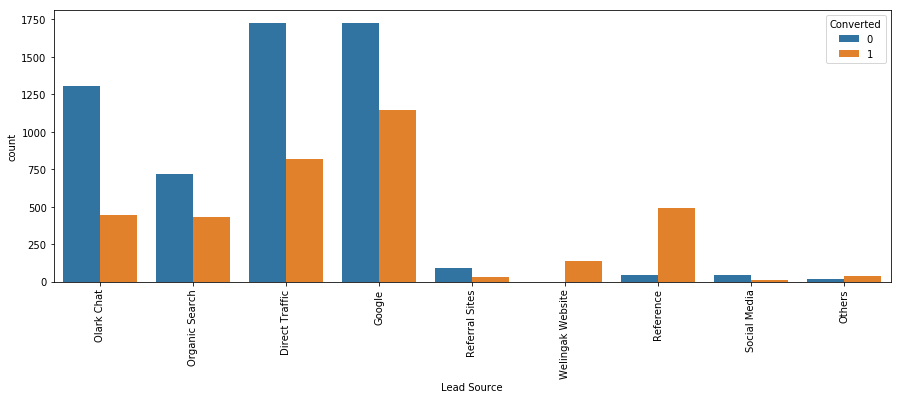

In [53]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(leads['Lead Source'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

<div class="alert alert-block alert-info"><b>Inference</b>
<br><li>Maximum number of leads are generated by Google and Direct traffic. But their conversion rate has to significantly improved. Clearly these are to most common channels to attract the prospective customers but company needs to strategise well to actually convert them to customers </li>
    <li>Conversion Rate of reference leads and leads through welingak website is high, but number of leads acquired is very low. </li>
    
</div>



In [54]:
# Last Activity:

leads['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [55]:
#replacing Nan Values and combining low frequency values

leads['Last Activity'] = leads['Last Activity'].replace(np.nan,'Others')
leads['Last Activity'] = leads['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

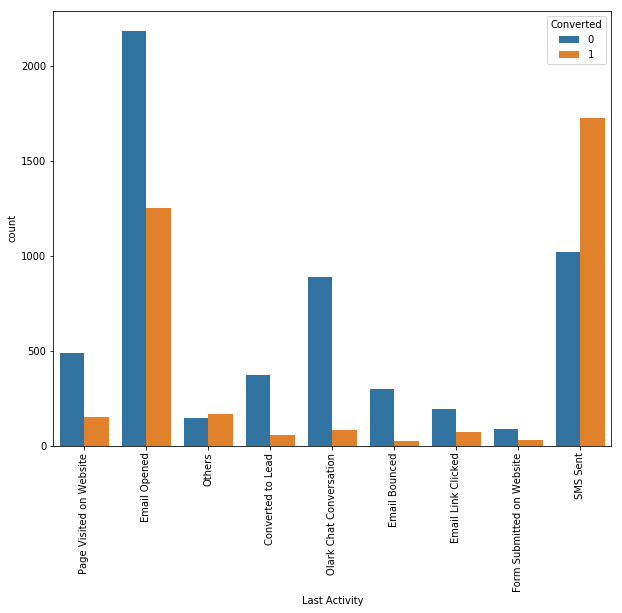

In [56]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(10,8))
s1=sns.countplot(leads['Last Activity'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

<div class="alert alert-block alert-info"><b>Inference</b>
<br><li>Email and SMS are clearly the channels that attract most number of prospects.</li><li>Interested folks are actually opening the emails. BUt after going through the details in the emails, the prospects are not convinced enough to get converted to customers.</li>
    <li>On the contrary, people going through teh details in SMS, are more likely to get converted.</li>
    
</div>

In [57]:
#Check the Null Values in All Columns:

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                0.0000
Lead Source                                0.0000
Do Not Email                               0.0000
Do Not Call                                0.0000
Converted                                  0.0000
TotalVisits                                1.4800
Total Time Spent on Website                0.0000
Page Views Per Visit                       1.4800
Last Activity                              0.0000
Specialization                             0.0000
What is your current occupation            0.0000
Search                                     0.0000
Magazine                                   0.0000
Newspaper Article                          0.0000
X Education Forums                         0.0000
Newspaper                                  0.0000
Digital Advertisement                      0.0000
Through Recommendations                    0.0000
Receive More Updates About Our Courses     0.0000
Tags                                       0.0000


In [58]:
#Drop all rows which have Nan Values. Since the number of Dropped rows is less than 2%,it will not affect the model

leads = leads.dropna()

In [59]:
#Checking percentage of Null Values in All Columns:

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                0.0000
Lead Source                                0.0000
Do Not Email                               0.0000
Do Not Call                                0.0000
Converted                                  0.0000
TotalVisits                                0.0000
Total Time Spent on Website                0.0000
Page Views Per Visit                       0.0000
Last Activity                              0.0000
Specialization                             0.0000
What is your current occupation            0.0000
Search                                     0.0000
Magazine                                   0.0000
Newspaper Article                          0.0000
X Education Forums                         0.0000
Newspaper                                  0.0000
Digital Advertisement                      0.0000
Through Recommendations                    0.0000
Receive More Updates About Our Courses     0.0000
Tags                                       0.0000


In [60]:
#Lead Origin

leads['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64

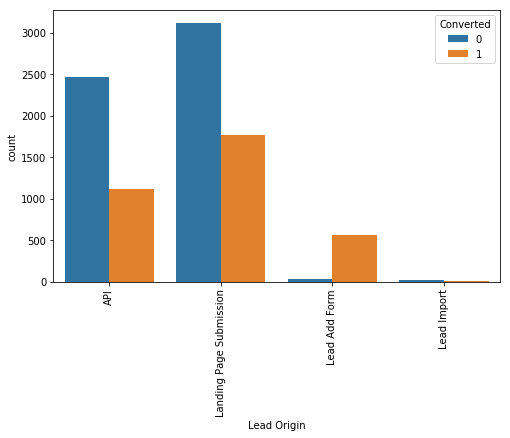

In [61]:
#visualizing count of Converted and Non- Converted based on Lead Origin

plt.figure(figsize=(8,5))
s1=sns.countplot(leads['Lead Origin'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

<div class="alert alert-block alert-info"><b>Inference</b>
<br><li> API and Landing Page Submission bring higher number of leads as well as conversion.</li>
<li>Lead Add Form has a very high conversion rate but count of leads are not very high.</li>
<li>Lead Import and Lead Add Form get very few leads.</li>
<li>In order to improve overall lead conversion rate, we have to improve lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.</li>
</div>



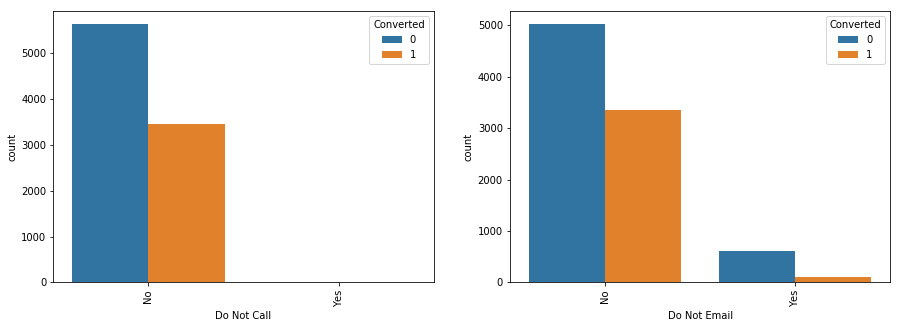

In [62]:
#Do Not Email & Do Not Call
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))

ax1=plt.subplot(1, 2, 1)
ax1=sns.countplot(leads['Do Not Call'], hue=leads.Converted)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(leads['Do Not Email'], hue=leads.Converted)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

In [63]:
#checking value counts for Do Not Call

leads['Do Not Call'].value_counts(dropna=False)

No     9101
Yes       2
Name: Do Not Call, dtype: int64

In [64]:
#checking value counts for Do Not Email

leads['Do Not Email'].value_counts(dropna=False)

No     8379
Yes     724
Name: Do Not Email, dtype: int64

In [65]:
# We Can drop the Do Not Call Column to the list of Column since it's No count value is greater than 99%.

leads = leads.drop(['Do Not Call'], axis=1)

In [66]:
leads['Search'].value_counts(dropna=False)

No     9089
Yes      14
Name: Search, dtype: int64

In [67]:
leads['Magazine'].value_counts(dropna=False)

No    9103
Name: Magazine, dtype: int64

In [68]:
leads['Newspaper Article'].value_counts(dropna=False)

No     9101
Yes       2
Name: Newspaper Article, dtype: int64

In [69]:
leads['X Education Forums'].value_counts(dropna=False)

No     9102
Yes       1
Name: X Education Forums, dtype: int64

In [70]:
leads['Newspaper'].value_counts(dropna=False)

No     9102
Yes       1
Name: Newspaper, dtype: int64

In [71]:
leads['Digital Advertisement'].value_counts(dropna=False)

No     9099
Yes       4
Name: Digital Advertisement, dtype: int64

In [72]:
leads['Through Recommendations'].value_counts(dropna=False)

No     9096
Yes       7
Name: Through Recommendations, dtype: int64

In [73]:
leads['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9103
Name: Receive More Updates About Our Courses, dtype: int64

In [74]:
leads['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9103
Name: Update me on Supply Chain Content, dtype: int64

In [75]:
leads['Get updates on DM Content'].value_counts(dropna=False)

No    9103
Name: Get updates on DM Content, dtype: int64

In [76]:
leads['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9103
Name: I agree to pay the amount through cheque, dtype: int64

In [77]:
leads['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6215
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [78]:
leads.shape

(9103, 24)

In [79]:
leads = leads.drop(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'], axis=1)

In [80]:
leads.shape

(9103, 13)

In [81]:
#checking value counts of last Notable Activity
leads['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Form Submitted on Website          1
Approached upfront                 1
View in browser link Clicked       1
Email Received                     1
Resubscribed to emails             1
Name: Last Notable Activity, dtype: int64

In [82]:
#clubbing lower frequency values

leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

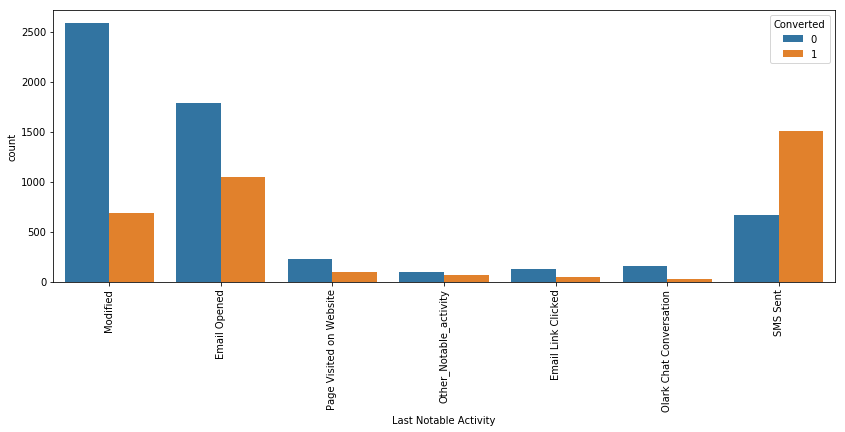

In [83]:
#visualizing count of Variable based on Converted value

plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

<div class="alert alert-block alert-info"><b>Inference</b>
<br><li> The last noted activity of most leads are either modified, or opened an email or a SMS had been sent to them.</li>
<li>We can once again observe that the highest successful conversion rate is among those to whom SMS was sent.</li>
</div>

In [84]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 13 columns):
Lead Origin                               9103 non-null object
Lead Source                               9103 non-null object
Do Not Email                              9103 non-null object
Converted                                 9103 non-null int64
TotalVisits                               9103 non-null float64
Total Time Spent on Website               9103 non-null int64
Page Views Per Visit                      9103 non-null float64
Last Activity                             9103 non-null object
Specialization                            9103 non-null object
What is your current occupation           9103 non-null object
Tags                                      9103 non-null object
A free copy of Mastering The Interview    9103 non-null object
Last Notable Activity                     9103 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 1.3+ MB


<h4><font color = purple > 4.3 Numerical Attribute Analysis</font></h4>

In [85]:
#Check the % of Data that has Converted Values = 1:

Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

38.02043282434362

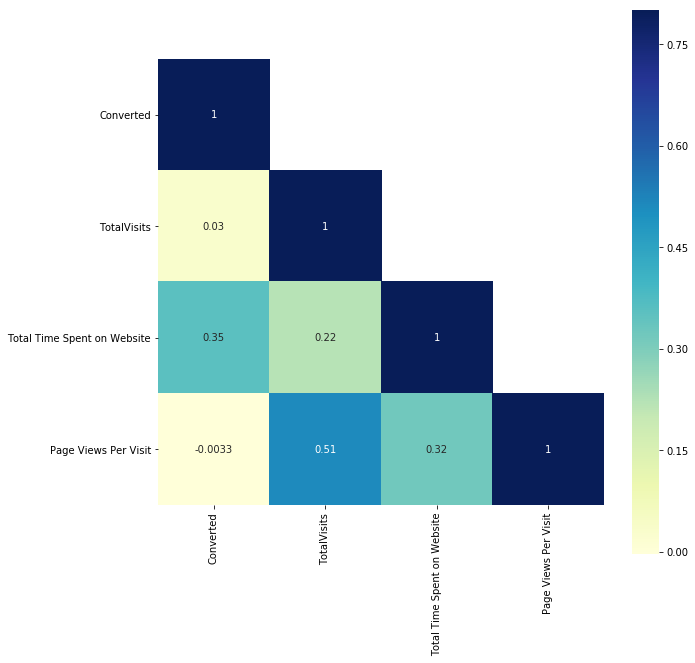

In [86]:
#Checking correlations of numeric values

mask = np.array(leads.corr())
mask[np.tril_indices_from(mask)] = False
fig,ax = plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(leads.corr(), cmap="YlGnBu",mask=mask,vmax=0.8,square=True, annot = True)
plt.show()

<div class="alert alert-block alert-info"><b>Inference</b>
<br><li> We can observe that total time spent on website has a pretty significant relation with conversion, than other aspects</li>
<li> Website being a good indicator, company may invest to make the website more lucrative to attract customers</li>
</div>

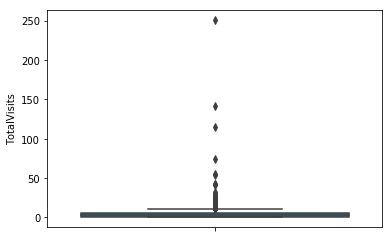

In [87]:
#visualizing spread of variable #Total Visits

plt.figure(figsize=(6,4))
sns.boxplot(y=leads['TotalVisits'])
plt.show()

In [88]:
#checking percentile values for "Total Visits"

leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])


count   9103.0000
mean       3.4452
std        4.8549
min        0.0000
5%         0.0000
25%        1.0000
50%        3.0000
75%        5.0000
90%        7.0000
95%       10.0000
99%       17.0000
max      251.0000
Name: TotalVisits, dtype: float64

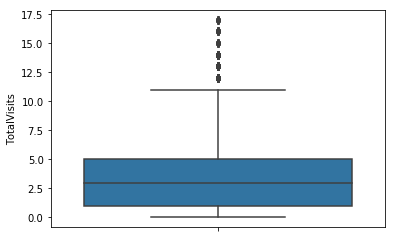

In [89]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = leads.TotalVisits.quantile(0.99)
leads = leads[(leads.TotalVisits <= Q3)]
Q1 = leads.TotalVisits.quantile(0.01)
leads = leads[(leads.TotalVisits >= Q1)]
sns.boxplot(y=leads['TotalVisits'])
plt.show()

In [90]:
#checking percentile values for "Total Visits"

leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count   9020.0000
mean       3.2070
std        2.9901
min        0.0000
5%         0.0000
25%        1.0000
50%        3.0000
75%        5.0000
90%        7.0000
95%        9.0000
99%       13.8100
max       17.0000
Name: TotalVisits, dtype: float64

In [91]:
leads.shape

(9020, 13)

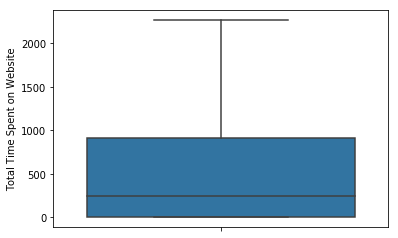

In [92]:
#visualizing spread of variable #Total Time Spent on Website

plt.figure(figsize=(6,4))
sns.boxplot(y=leads['Total Time Spent on Website'])
plt.show()

In [93]:
#checking percentiles for "Total Time Spent on Website"

leads['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count   9020.0000
mean     479.7595
std      544.6882
min        0.0000
5%         0.0000
25%        7.0000
50%      243.0000
75%      915.2500
90%     1371.0000
95%     1554.0500
99%     1836.6200
max     2272.0000
Name: Total Time Spent on Website, dtype: float64

<div class="alert alert-block alert-info"><b>Inference</b>
<br>Since there are no major Outliers for the above variable we don't do any Outlier Treatment for this above Column</li>
</div>

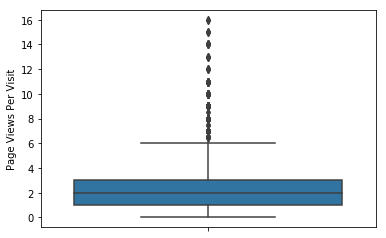

In [94]:
#visualizing spread of variable #Page Views Per Visit

plt.figure(figsize=(6,4))
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

In [95]:
#checking percentiles for "Page Views Per Visit"

leads['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count   9020.0000
mean       2.3373
std        2.0624
min        0.0000
5%         0.0000
25%        1.0000
50%        2.0000
75%        3.0000
90%        5.0000
95%        6.0000
99%        9.0000
max       16.0000
Name: Page Views Per Visit, dtype: float64

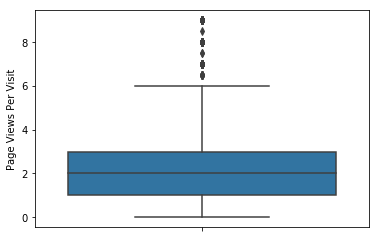

In [96]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = leads['Page Views Per Visit'].quantile(0.99)
leads = leads[(leads['Page Views Per Visit'] <= Q3)]
Q1 = leads['Page Views Per Visit'].quantile(0.01)
leads = leads[(leads['Page Views Per Visit'] >= Q1)]
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

In [97]:
leads.shape

(8953, 13)

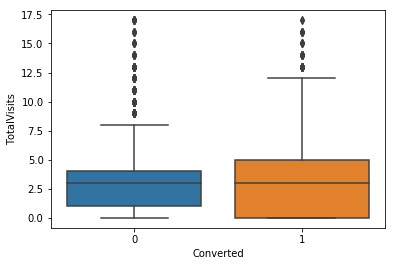

In [98]:
#checking Spread of "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.show()

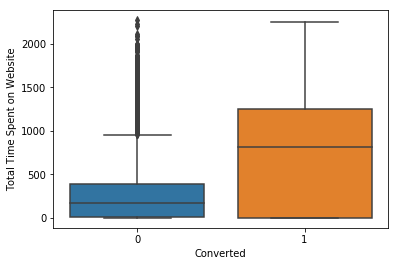

In [99]:
#checking Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(x='Converted', y='Total Time Spent on Website', data = leads)
plt.show()

<div class="alert alert-block alert-info"><b>Inference</b>
<br>We got a reconfirmation that Leads spending more time on the website are more likely to be converted.
Website should be made more engaging to make leads spend more time./li>
</div>

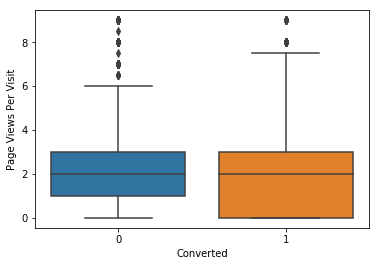

In [100]:
#checking Spread of "Page Views Per Visit" vs Converted variable

sns.boxplot(x=leads.Converted,y=leads['Page Views Per Visit'])
plt.show()

In [101]:
#checking missing values in leftover columns/

round(100*(leads.isnull().sum()/len(leads.index)),2)

Lead Origin                              0.0000
Lead Source                              0.0000
Do Not Email                             0.0000
Converted                                0.0000
TotalVisits                              0.0000
Total Time Spent on Website              0.0000
Page Views Per Visit                     0.0000
Last Activity                            0.0000
Specialization                           0.0000
What is your current occupation          0.0000
Tags                                     0.0000
A free copy of Mastering The Interview   0.0000
Last Notable Activity                    0.0000
dtype: float64

In [102]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 13 columns):
Lead Origin                               8953 non-null object
Lead Source                               8953 non-null object
Do Not Email                              8953 non-null object
Converted                                 8953 non-null int64
TotalVisits                               8953 non-null float64
Total Time Spent on Website               8953 non-null int64
Page Views Per Visit                      8953 non-null float64
Last Activity                             8953 non-null object
Specialization                            8953 non-null object
What is your current occupation           8953 non-null object
Tags                                      8953 non-null object
A free copy of Mastering The Interview    8953 non-null object
Last Notable Activity                     8953 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 1.3+ MB


## <a id="32">5. Logistic Regression Modelling</a>
<h4><font color = purple > 5.1 Dummy Variable Creation for Data Modelling</font></h4>

In [103]:
#getting a list of categorical columns

cat_cols= leads.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [104]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0000,0,0.0000,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,No,Modified
1,API,Organic Search,No,0,5.0000,674,2.5000,Email Opened,Not Specified,Unemployed,Ringing,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0000,1532,2.0000,Email Opened,Business Administration,Student,Will revert after reading the email,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0000,305,1.0000,Others,Media and Advertising,Unemployed,Ringing,No,Modified
4,Landing Page Submission,Google,No,1,2.0000,1428,1.0000,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,No,Modified


In [105]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)

In [106]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0000,0,0.0000,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,0,Modified
1,API,Organic Search,0,0,5.0000,674,2.5000,Email Opened,Not Specified,Unemployed,Ringing,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0000,1532,2.0000,Email Opened,Business Administration,Student,Will revert after reading the email,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0000,305,1.0000,Others,Media and Advertising,Unemployed,Ringing,0,Modified
4,Landing Page Submission,Google,0,1,2.0000,1428,1.0000,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,0,Modified


In [107]:
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [108]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(leads['Lead Origin'],prefix  = 'Lead_Origin', drop_first=True)
leads = pd.concat([leads,dummy],axis = 1)

In [109]:
dummy = pd.get_dummies(leads['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [110]:
dummy = pd.get_dummies(leads['Do Not Email'], prefix  = 'Do Not Email_' , drop_first=True)
leads = pd.concat([leads,dummy],axis = 1)

In [111]:
dummy = pd.get_dummies(leads['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [112]:
dummy = pd.get_dummies(leads['Specialization'], prefix  = 'Specialize')
dummy = dummy.drop(['Specialize_Not Specified'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [113]:
dummy = pd.get_dummies(leads['What is your current occupation'], prefix  = 'Current Occupation')
dummy = dummy.drop(['Current Occupation_Not Specified'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [114]:
dummy = pd.get_dummies(leads['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Not Specified'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [115]:
dummy = pd.get_dummies(leads['A free copy of Mastering The Interview'],prefix  = 'A free copy of Mastering The Interview_', drop_first=True)
leads = pd.concat([leads,dummy],axis = 1)

In [116]:
dummy = pd.get_dummies(leads['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [117]:
leads.shape

(8953, 63)

In [118]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Do Not Email__1,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialize_Banking, Investment And Insurance",Specialize_Business Administration,Specialize_E-Business,Specialize_E-COMMERCE,Specialize_International Business,Specialize_Management_Specializations,Specialize_Media and Advertising,Specialize_Rural and Agribusiness,Specialize_Services Excellence,Specialize_Travel and Tourism,Current Occupation_Businessman,Current Occupation_Housewife,Current Occupation_Other,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,A free copy of Mastering The Interview__1,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,API,Olark Chat,0,0,0.0000,0,0.0000,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,0,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,API,Organic Search,0,0,5.0000,674,2.5000,Email Opened,Not Specified,Unemployed,Ringing,0,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0000,1532,2.0000,Email Opened,Business Administration,Student,Will revert after reading the email,1,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0000,305,1.0000,Others,Media and Advertising,Unemployed,Ringing,0,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,Landing Page Submission,Google,0,1,2.0000,1428,1.0000,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,0,Modified,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [119]:
#dropping the original columns after dummy variable creation

leads.drop(cat_cols,1,inplace = True)

In [120]:
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Do Not Email__1,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialize_Banking, Investment And Insurance",Specialize_Business Administration,Specialize_E-Business,Specialize_E-COMMERCE,Specialize_International Business,Specialize_Management_Specializations,Specialize_Media and Advertising,Specialize_Rural and Agribusiness,Specialize_Services Excellence,Specialize_Travel and Tourism,Current Occupation_Businessman,Current Occupation_Housewife,Current Occupation_Other,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,A free copy of Mastering The Interview__1,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0000,0,0.0000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,0,5.0000,674,2.5000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,1,2.0000,1532,2.0000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0
3,0,1.0000,305,1.0000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,1,2.0000,1428,1.0000,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [121]:
leads.shape

(8953, 54)

<h4><font color = purple > 5.2 Train - Test Split of data</font></h4>

In [122]:
from sklearn.model_selection import train_test_split

# Putting response variable to y
y = leads['Converted']

y.head()

X=leads.drop('Converted', axis=1)

In [123]:
# Splitting the data into train and test :

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [124]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6267 entries, 9196 to 5825
Data columns (total 53 columns):
TotalVisits                                      6267 non-null float64
Total Time Spent on Website                      6267 non-null int64
Page Views Per Visit                             6267 non-null float64
Lead_Origin_Landing Page Submission              6267 non-null uint8
Lead_Origin_Lead Add Form                        6267 non-null uint8
Lead_Origin_Lead Import                          6267 non-null uint8
Lead Source_Direct Traffic                       6267 non-null uint8
Lead Source_Google                               6267 non-null uint8
Lead Source_Olark Chat                           6267 non-null uint8
Lead Source_Organic Search                       6267 non-null uint8
Lead Source_Reference                            6267 non-null uint8
Lead Source_Referral Sites                       6267 non-null uint8
Lead Source_Social Media                         6267 non-


<h4><font color = purple > 5.3 Scaling of Data</font></h4>

In [125]:
#scaling numeric columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Do Not Email__1,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialize_Banking, Investment And Insurance",Specialize_Business Administration,Specialize_E-Business,Specialize_E-COMMERCE,Specialize_International Business,Specialize_Management_Specializations,Specialize_Media and Advertising,Specialize_Rural and Agribusiness,Specialize_Services Excellence,Specialize_Travel and Tourism,Current Occupation_Businessman,Current Occupation_Housewife,Current Occupation_Other,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,A free copy of Mastering The Interview__1,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
9196,0.6689,1.8481,1.4558,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4696,-0.0307,-0.0378,0.4000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3274,0.3191,-0.6421,-0.1280,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2164,-0.3805,-0.1547,-0.1280,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1667,0.3191,1.2584,-0.4817,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


<h4><font color = purple > 5.3 Model Building using Stats Model & RFE</font></h4>

In [126]:
import statsmodels.api as sm

In [127]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [128]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)            # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [129]:
rfe.support_

array([False,  True, False, False,  True, False,  True, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False,  True,  True, False, False])

In [130]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 22),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 20),
 ('Lead_Origin_Landing Page Submission', False, 15),
 ('Lead_Origin_Lead Add Form', True, 1),
 ('Lead_Origin_Lead Import', False, 32),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Google', False, 2),
 ('Lead Source_Olark Chat', False, 34),
 ('Lead Source_Organic Search', False, 3),
 ('Lead Source_Reference', False, 23),
 ('Lead Source_Referral Sites', False, 4),
 ('Lead Source_Social Media', False, 8),
 ('Lead Source_Welingak Website', True, 1),
 ('Do Not Email__1', True, 1),
 ('Last Activity_Converted to Lead', False, 10),
 ('Last Activity_Email Bounced', False, 11),
 ('Last Activity_Email Link Clicked', False, 31),
 ('Last Activity_Email Opened', False, 17),
 ('Last Activity_Form Submitted on Website', False, 25),
 ('Last Activity_Olark Chat Conversation', False, 6),
 ('Last Activity_Page Visited on Website', False, 9),
 ('Last Activity_SMS Sent', True, 1),
 ('Spe

In [131]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead_Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Welingak Website',
       'Do Not Email__1', 'Last Activity_SMS Sent',
       'Specialize_Travel and Tourism', 'Current Occupation_Student',
       'Current Occupation_Unemployed',
       'Current Occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [132]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead_Origin_Landing Page Submission', 'Lead_Origin_Lead Import',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Specialize_Banking, Investment And Insurance',
       'Specialize_Business Administration', 'Specialize_E-Business',
       'Specialize_E-COMMERCE', 'Specialize_International Business',
       'Specialize_Management_Specializations',
       'Specialize_Media and Advertising', 'Specialize_Rural and Agribusiness',
       'Specialize_Services Excellence', 'Current Occupation_Businessman',
       'Cu

In [133]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6246
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1106.0
Date:                Mon, 17 Apr 2023   Deviance:                       2212.0
Time:                        06:28:14   Pearson chi2:                 9.52e+03
No. Iterations:                     8   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.8488      0.111    -16.725      0.000      -2.065      -1.632
Total Time Spent on Website                       0.9050      0.057     15.846      0.000       0.793       1.017
Lead_Origin_Lead Add Form                         1.3654      0.461      2.963      0.003       0.462       2.269
Lead Source_Direct Traffic                       -0.7038      0.136     -5.170      0.000      -0.971      -0.437
Lead Source_Welingak Website                      2.5581      1.119      2.286      0.022       0.365       4.751
Do Not Email__1                                  -1.0457      0.255     -4.107      0.000      -1.545      -0.547
Last Activity_SMS Sent                            2.0560      0.126     16.303      0.000       1.809       2.303
Specialize_Travel and Tourism                    -1.0308      0.477     -2.163      0.031      -1.965      -0.097
Current Occupation_Student                        2.3556      0.591      3.987      0.000       1.198       3.514
Current Occupation_Unemployed                     2.4615      0.156     15.818      0.000       2.156       2.766
Current Occupation_Working Professional           3.0427      0.428      7.107      0.000       2.204       3.882
Tags_Busy                                        -1.3058      0.257     -5.085      0.000      -1.809      -0.802
Tags_Closed by Horizzon                           5.3722      1.032      5.205      0.000       3.349       7.395
Tags_Interested in other courses                 -3.9164      0.423     -9.261      0.000      -4.745      -3.088
Tags_Lost to EINS                                 5.0095      0.629      7.959      0.000       3.776       6.243
Tags_Other_Tags                                  -4.0806      0.243    -16.827      0.000      -4.556      -3.605
Tags_Ringing                                     -5.2198      0.273    -19.095      0.000      -5.756      -4.684
Tags_Will revert after reading the email          2.7076      0.220     12.290      0.000       2.276       3.139
Last Notable Activity_Email Link Clicked         -1.2420      0.533     -2.331      0.020      -2.286      -0.198
Last Notable Activity_Modified                   -1.3937      0.132    -10.518      0.000      -1.653      -1.134
Last Notable Activity_Olark Chat Conversation    -2.1034      0.543     -3.874      0.000      -3.168      -1.039
=================================================================================================================
"""

In [134]:
# # Dropping column with high P-value:
# col = col.drop('Current Occupation_Housewife',1)

ValueError: labels ['Current Occupation_Housewife'] not contained in axis

In [135]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6246
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1106.0
Date:                Mon, 17 Apr 2023   Deviance:                       2212.0
Time:                        06:29:45   Pearson chi2:                 9.52e+03
No. Iterations:                     8   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.8488      0.111    -16.725      0.000      -2.065      -1.632
Total Time Spent on Website                       0.9050      0.057     15.846      0.000       0.793       1.017
Lead_Origin_Lead Add Form                         1.3654      0.461      2.963      0.003       0.462       2.269
Lead Source_Direct Traffic                       -0.7038      0.136     -5.170      0.000      -0.971      -0.437
Lead Source_Welingak Website                      2.5581      1.119      2.286      0.022       0.365       4.751
Do Not Email__1                                  -1.0457      0.255     -4.107      0.000      -1.545      -0.547
Last Activity_SMS Sent                            2.0560      0.126     16.303      0.000       1.809       2.303
Specialize_Travel and Tourism                    -1.0308      0.477     -2.163      0.031      -1.965      -0.097
Current Occupation_Student                        2.3556      0.591      3.987      0.000       1.198       3.514
Current Occupation_Unemployed                     2.4615      0.156     15.818      0.000       2.156       2.766
Current Occupation_Working Professional           3.0427      0.428      7.107      0.000       2.204       3.882
Tags_Busy                                        -1.3058      0.257     -5.085      0.000      -1.809      -0.802
Tags_Closed by Horizzon                           5.3722      1.032      5.205      0.000       3.349       7.395
Tags_Interested in other courses                 -3.9164      0.423     -9.261      0.000      -4.745      -3.088
Tags_Lost to EINS                                 5.0095      0.629      7.959      0.000       3.776       6.243
Tags_Other_Tags                                  -4.0806      0.243    -16.827      0.000      -4.556      -3.605
Tags_Ringing                                     -5.2198      0.273    -19.095      0.000      -5.756      -4.684
Tags_Will revert after reading the email          2.7076      0.220     12.290      0.000       2.276       3.139
Last Notable Activity_Email Link Clicked         -1.2420      0.533     -2.331      0.020      -2.286      -0.198
Last Notable Activity_Modified                   -1.3937      0.132    -10.518      0.000      -1.653      -1.134
Last Notable Activity_Olark Chat Conversation    -2.1034      0.543     -3.874      0.000      -3.168      -1.039
=================================================================================================================
"""

<div class="alert alert-block alert-info"><b>Inference</b>
<br>Since all the variables have the p-values are less we can check the Variance Inflation Factor to see if there is any correlation between the variables

</div>

In [136]:
# Check for the VIF values of the feature variables:

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [137]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs :

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Current Occupation_Unemployed,8.1900
16,Tags_Will revert after reading the email,4.1600
14,Tags_Other_Tags,3.0700
15,Tags_Ringing,2.6500
9,Current Occupation_Working Professional,2.2000
1,Lead_Origin_Lead Add Form,1.8500
12,Tags_Interested in other courses,1.7100
5,Last Activity_SMS Sent,1.5800
11,Tags_Closed by Horizzon,1.5700
18,Last Notable Activity_Modified,1.4700


In [138]:
# drop the column with high VIF
col = col.drop('Current Occupation_Unemployed',1)

In [139]:
#BUILDING MODEL #3

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6247
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1242.7
Date:                Mon, 17 Apr 2023   Deviance:                       2485.5
Time:                        06:29:46   Pearson chi2:                 8.31e+03
No. Iterations:                     8   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.0735      0.086    -12.455      0.000      -1.242      -0.905
Total Time Spent on Website                       0.8810      0.053     16.566      0.000       0.777       0.985
Lead_Origin_Lead Add Form                         1.7027      0.447      3.808      0.000       0.826       2.579
Lead Source_Direct Traffic                       -0.8100      0.129     -6.283      0.000      -1.063      -0.557
Lead Source_Welingak Website                      3.9252      1.111      3.534      0.000       1.748       6.102
Do Not Email__1                                  -0.8589      0.242     -3.546      0.000      -1.334      -0.384
Last Activity_SMS Sent                            1.9609      0.115     17.074      0.000       1.736       2.186
Specialize_Travel and Tourism                    -1.2178      0.452     -2.696      0.007      -2.103      -0.333
Current Occupation_Student                        0.0894      0.600      0.149      0.881      -1.086       1.265
Current Occupation_Working Professional           0.9658      0.413      2.336      0.019       0.156       1.776
Tags_Busy                                         0.5088      0.226      2.250      0.024       0.066       0.952
Tags_Closed by Horizzon                           7.0347      1.021      6.893      0.000       5.034       9.035
Tags_Interested in other courses                 -2.1507      0.405     -5.315      0.000      -2.944      -1.358
Tags_Lost to EINS                                 5.8875      0.611      9.636      0.000       4.690       7.085
Tags_Other_Tags                                  -2.2984      0.210    -10.922      0.000      -2.711      -1.886
Tags_Ringing                                     -3.4334      0.240    -14.314      0.000      -3.904      -2.963
Tags_Will revert after reading the email          4.4010      0.196     22.409      0.000       4.016       4.786
Last Notable Activity_Email Link Clicked         -1.2919      0.511     -2.527      0.012      -2.294      -0.290
Last Notable Activity_Modified                   -1.6116      0.126    -12.772      0.000      -1.859      -1.364
Last Notable Activity_Olark Chat Conversation    -1.7832      0.489     -3.647      0.000      -2.741      -0.825
=================================================================================================================
"""

In [140]:
# p-value of variable Current Occupation_Student is high, so we can drop it.
# dropping column with high p-value
col = col.drop('Current Occupation_Student',1)

In [141]:
#BUILDING MODEL #4

X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6248
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1242.7
Date:                Mon, 17 Apr 2023   Deviance:                       2485.5
Time:                        06:29:46   Pearson chi2:                 8.31e+03
No. Iterations:                     8   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.0733      0.086    -12.455      0.000      -1.242      -0.904
Total Time Spent on Website                       0.8810      0.053     16.566      0.000       0.777       0.985
Lead_Origin_Lead Add Form                         1.7037      0.447      3.813      0.000       0.828       2.579
Lead Source_Direct Traffic                       -0.8097      0.129     -6.281      0.000      -1.062      -0.557
Lead Source_Welingak Website                      3.9240      1.111      3.533      0.000       1.747       6.101
Do Not Email__1                                  -0.8589      0.242     -3.546      0.000      -1.334      -0.384
Last Activity_SMS Sent                            1.9603      0.115     17.080      0.000       1.735       2.185
Specialize_Travel and Tourism                    -1.2190      0.452     -2.699      0.007      -2.104      -0.334
Current Occupation_Working Professional           0.9632      0.413      2.332      0.020       0.154       1.773
Tags_Busy                                         0.5095      0.226      2.255      0.024       0.067       0.952
Tags_Closed by Horizzon                           7.0355      1.021      6.894      0.000       5.035       9.036
Tags_Interested in other courses                 -2.1505      0.405     -5.315      0.000      -2.944      -1.357
Tags_Lost to EINS                                 5.8876      0.611      9.636      0.000       4.690       7.085
Tags_Other_Tags                                  -2.2939      0.208    -11.017      0.000      -2.702      -1.886
Tags_Ringing                                     -3.4332      0.240    -14.313      0.000      -3.903      -2.963
Tags_Will revert after reading the email          4.4043      0.195     22.555      0.000       4.022       4.787
Last Notable Activity_Email Link Clicked         -1.2899      0.510     -2.527      0.012      -2.290      -0.289
Last Notable Activity_Modified                   -1.6116      0.126    -12.772      0.000      -1.859      -1.364
Last Notable Activity_Olark Chat Conversation    -1.7827      0.489     -3.645      0.000      -2.741      -0.824
=================================================================================================================
"""

In [142]:
#Since 'All' the p-values are less we can check the Variance Inflation Factor to see if there is any correlation between the variables
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead_Origin_Lead Add Form,1.8500
14,Tags_Will revert after reading the email,1.7800
5,Last Activity_SMS Sent,1.5100
16,Last Notable Activity_Modified,1.4600
2,Lead Source_Direct Traffic,1.4200
3,Lead Source_Welingak Website,1.3500
7,Current Occupation_Working Professional,1.3100
12,Tags_Other_Tags,1.2600
9,Tags_Closed by Horizzon,1.2500
0,Total Time Spent on Website,1.2300


<div class="alert alert-block alert-info"><b>Inference</b>
<br>Since all the variables seem to be in order now, with proper P - value and VIF, we can move to derive the Probabilities, Lead Score, Predictions on Train Data.

</div>

In [143]:
# Getting the Predicted values on the train set :

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

9196   0.2854
4696   0.0326
3274   0.5796
2164   0.0069
1667   0.9883
7024   0.1368
8018   0.0260
778    0.2144
6942   0.0032
4440   0.1020
dtype: float64

In [144]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.28537602, 0.03263269, 0.57962838, 0.00688341, 0.9883378 ,
       0.13684916, 0.02597225, 0.21442806, 0.0031813 , 0.10198848])

In [145]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.2854,9196
1,0,0.0326,4696
2,0,0.5796,3274
3,0,0.0069,2164
4,1,0.9883,1667


In [146]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.2854,9196,0
1,0,0.0326,4696,0
2,0,0.5796,3274,1
3,0,0.0069,2164,0
4,1,0.9883,1667,1


<h4><font color = purple > 5.4 Confusion Matrix</font></h4>

In [147]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3704  178]
 [ 272 2113]]


In [148]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9281953087601723


In [149]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [150]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8859538784067086

In [151]:
# Let us calculate specificity
TN / float(TN+FP)

0.9541473467284904

In [152]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.04585265327150953


In [153]:
# positive predictive value 
print (TP / float(TP+FP))

0.9223046704495853


In [154]:
# Negative predictive value
print (TN / float(TN+ FN))

0.93158953722334


<h4><font color = purple > 5.5 Plotting ROC CURVE</font></h4>

In [155]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [156]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, 
                                         y_train_pred_final.Converted_prob, 
                                         drop_intermediate = False )

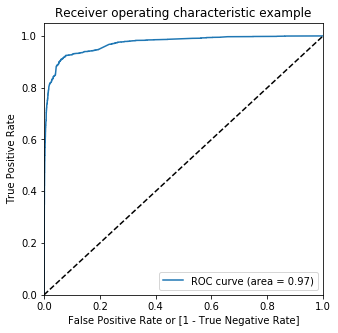

In [157]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)


<div class="alert alert-block alert-info"><b>Inference</b>
<br>The ROC Curve should be a value close to 1. We are getting a good value of 0.97 indicating a good predictive model.
</div>

<h4><font color = purple > 5.6 Finding Optimal Cutoff Point</font></h4>


<b>Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that:</b>

In [158]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.2854,9196,0,1,1,1,0,0,0,0,0,0,0
1,0,0.0326,4696,0,1,0,0,0,0,0,0,0,0,0
2,0,0.5796,3274,1,1,1,1,1,1,1,0,0,0,0
3,0,0.0069,2164,0,1,0,0,0,0,0,0,0,0,0
4,1,0.9883,1667,1,1,1,1,1,1,1,1,1,1,1


In [159]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0000,0.0000,0.3806,1.0000,0.0000
0.1000,0.1000,0.8273,0.9748,0.7367
0.2000,0.2000,0.8988,0.9329,0.8779
0.3000,0.3000,0.9237,0.9191,0.9266
0.4000,0.4000,0.9277,0.9010,0.9441
0.5000,0.5000,0.9282,0.8860,0.9541
0.6000,0.6000,0.9178,0.8352,0.9686
0.7000,0.7000,0.9172,0.8138,0.9807
0.8000,0.8000,0.9057,0.7753,0.9858
0.9000,0.9000,0.8880,0.7208,0.9907


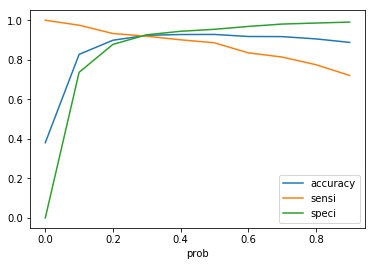

In [160]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

<div class="alert alert-block alert-info"><b>Inference</b>
<br>From the curve above, 0.3 is the optimum point to take as a cutoff probability
</div>

In [161]:
#Final prediction using the optimal cutoff of probability

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)



In [162]:
y_train_pred_final.head(30)

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.2854,9196,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.0326,4696,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.5796,3274,1,1,1,1,1,1,1,0,0,0,0,1
3,0,0.0069,2164,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.9883,1667,1,1,1,1,1,1,1,1,1,1,1,1
5,0,0.1368,7024,0,1,1,0,0,0,0,0,0,0,0,0
6,0,0.0260,8018,0,1,0,0,0,0,0,0,0,0,0,0
7,0,0.2144,778,0,1,1,1,0,0,0,0,0,0,0,0
8,0,0.0032,6942,0,1,0,0,0,0,0,0,0,0,0,0
9,0,0.1020,4440,0,1,1,0,0,0,0,0,0,0,0,0


In [163]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.2854,9196,0,29
1,0,0.0326,4696,0,3
2,0,0.5796,3274,1,58
3,0,0.0069,2164,0,1
4,1,0.9883,1667,1,99


In [164]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9237274613052497

In [165]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3597,  285],
       [ 193, 2192]])

In [166]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [167]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.919077568134172

In [168]:
# Let us calculate specificity
TN / float(TN+FP)

0.9265842349304482

<div class="alert alert-block alert-info"><b>Inference</b>
<br>So as we can see above the model seems to be performing well. The ROC curve has a value of 0.97, which is very good. We have the following values for the Train Data:
    <li>Accuracy : 92.88%</li><li>Sensitivity : 91.82%</li><li>Specificity : 93.53%</li>

</div>

#### Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall.
<h4><font color = purple > 5.7 Other Stats</font></h4>

In [169]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.07341576506955177


In [170]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8849414614452967


In [171]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9490765171503958


In [172]:
#Looking at the confusion matrix again

confusion3 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion3

array([[3597,  285],
       [ 193, 2192]])

In [173]:
##### Precision
TP / TP + FP

confusion3[1,1]/(confusion3[0,1]+confusion3[1,1])

0.8849414614452967

In [174]:
##### Recall
TP / TP + FN

confusion3[1,1]/(confusion3[1,0]+confusion3[1,1])

0.919077568134172

In [175]:
from sklearn.metrics import precision_score, recall_score

In [176]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.8849414614452967

In [177]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.919077568134172

In [178]:
from sklearn.metrics import precision_recall_curve

In [179]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

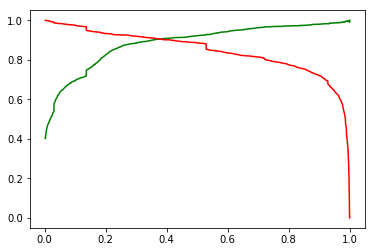

In [180]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## <a id="32">6. Prediction on Test Set</a>
<h4><font color = purple > 6.1 Scaling the test data</font></h4>

In [181]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Do Not Email__1,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialize_Banking, Investment And Insurance",Specialize_Business Administration,Specialize_E-Business,Specialize_E-COMMERCE,Specialize_International Business,Specialize_Management_Specializations,Specialize_Media and Advertising,Specialize_Rural and Agribusiness,Specialize_Services Excellence,Specialize_Travel and Tourism,Current Occupation_Businessman,Current Occupation_Housewife,Current Occupation_Other,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,A free copy of Mastering The Interview__1,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
7681,0.6689,-0.3044,0.1360,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
984,-0.0307,-0.5381,0.4000,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
8135,-0.3805,0.7947,-0.1280,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
6915,0.3191,-0.6148,-0.1280,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0
2712,-0.0307,-0.4121,0.4000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [182]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead_Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Welingak Website,Do Not Email__1,Last Activity_SMS Sent,Specialize_Travel and Tourism,Current Occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Link Clicked,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
7681,-0.3044,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
984,-0.5381,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
8135,0.7947,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
6915,-0.6148,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2712,-0.4121,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [183]:
X_test_sm = sm.add_constant(X_test)

In [184]:
y_test_pred = res.predict(X_test_sm)

In [185]:
y_test_pred[:10]

7681   0.0260
984    0.0295
8135   0.4796
6915   0.0064
2712   0.9511
244    0.0026
4698   0.0170
8287   0.0307
6791   0.9802
8970   0.0061
dtype: float64

In [186]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [187]:
# Let's see the head
y_pred_1.head()

,0
7681,0.0260
984,0.0295
8135,0.4796
6915,0.0064
2712,0.9511


In [188]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [189]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [190]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [191]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [192]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7681,0.0260
1,0,984,0.0295
2,0,8135,0.4796
3,0,6915,0.0064
4,1,2712,0.9511


In [193]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [194]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,7681,0.0260
1,0,984,0.0295
2,0,8135,0.4796
3,0,6915,0.0064
4,1,2712,0.9511


In [195]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [196]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,7681,0,0.0260,3
1,984,0,0.0295,3
2,8135,0,0.4796,48
3,6915,0,0.0064,1
4,2712,1,0.9511,95


In [197]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [198]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,7681,0,0.0260,3,0
1,984,0,0.0295,3,0
2,8135,0,0.4796,48,1
3,6915,0,0.0064,1,0
4,2712,1,0.9511,95,1


In [199]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9281459419210722

In [200]:
confusion4 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion4

array([[1565,  111],
       [  82,  928]])

In [201]:
TP = confusion4[1,1] # true positive 
TN = confusion4[0,0] # true negatives
FP = confusion4[0,1] # false positives
FN = confusion4[1,0] # false negatives

In [202]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9188118811881189

In [203]:
# Let us calculate specificity
TN / float(TN+FP)

0.9337708830548926

In [204]:
# Precision
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.8931665062560153

In [205]:
# recall
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9188118811881189

<div class="alert alert-block alert-info"><b>Inference</b>
<br>After running the model on the Test Data these are the figures we obtain:
<li> Accuracy : 92.88% </li>
<li> Sensitivity : 91.696% </li>
<li> Specificity : 92.76% </li>

</div>

<div class="alert alert-block alert-info"><b>Final Observation:</b>
Let us compare the values obtained for Train & Test:<br><br>
    <b> Train Data: </b>       
    <li>Accuracy : 92.88%</li><li>Sensitivity : 91.82%</li><li>Specificity : 93.53%</li>    
    <br> <b>Test Data :</b>
<li> Accuracy : 92.88% </li>
<li> Sensitivity : 91.696% </li>
<li> Specificity : 92.76% </li>

</div>

### The Model seems to predict the Conversion Rate in both train and test sets very well and we should be able to give the CEO confidence in making good calls based on this model.



In seasons when the company hires interns and has high manpower and aims to make the lead conversion more aggressive, the company may contact all the leads which have a conversion probability (value = 1) under a cut off 0.3 .
From business knowledge perspective, to achieve maximum conversion, phone calls must be done to the all the people with a lead score from 40 to 100 and primarily if: 
<li>They spend a lot of time in the website and this can be done by making the website interesting and thus bringing them back to the site. 
<li>They are seen coming back to the website repeatedly 
<li>Their last activity is through SMS or through Olark chat conversation 
<li>They are working professionals 


Similarly, whne the company reaches its target for a quarter before a deadline and wants to focus on some new work, they need to minimize the rate of useless phojne calls.
In this case, they can choose a higher threshold value for Conversion Probability and may contact all the leads which have a conversion probabilty (value = 1 highlighted in yellow color) under column 0.7. However, the flipside here would be that, we may miss out on those leads that are actually converted but then the model wrongly predicted them as not converted.
From the business perspective, the company need to focus more on hot leads with probability score higher than 90 and other methods like automated emails and SMS. This way manual calling won’t be required unless it is an emergency. The above strategy can be used but with the customers that have a very high chance of buying the course.

## <a id="32">7. Final Inference</a>
<div class="alert alert-block alert-info">
 <b>Top Three Variables</b><br><i>
Based on the coefficient values from the final model, the following are the top three variables that contribute most towards the probability of a lead getting converted :
<li>Tags_Closed by Horizzon</li>
<li>Tags_Lost to EINS</li>
<li>Tags_Will revert after reading the email</li>
    <br> There is a high conversion rate on leads closed by Horizzon or lost to EINS, but the total number of leads acquired throughthese channels, are pretty low. Company should focus on reaching more prospects here. Also prospects who have committed to revert after reading the email, are more likely to convert to actually paying customers. So the company can follow up on them in a more diligent way.<br> <br> 
     <b> Other Observations and Suggestions</b><br><i>From the EDAsteps , we have also observed that :    
    <li>There is a very high conversion rate of leads coming through Welingak website, but again the number of leads acquired here is low. Company needs to promote more here</li>
    <li>A huge portion of leads come from the Unemployed section with  a not so great converison rate. Company can think of providing discounts or scholarships to lure them</li>
    <li>Working professionals have a good chance of converison. Company can tryto increase the revenue form this channel as well</li>
    <li>Almost everyone opting for the courses are doing so, for better job prospects and many of them ar eunemployed too. So good job placement aid will facilitate the conversion</li>
    <li>People spending more time on the website, are more likely to get converted. So the website should be made more engaging and informative.</li>
    <li>SMS and emails are the most successfu ways of communication and should be prioritised</li>
    </i>      
<br><b>Business Strategies:</b><i>
    <br> In seasons when the company hires interns and has high manpower and aims to make the lead conversion more aggressive, the company may contact all the leads which have a conversion probability (value = 1) under a cut off 0.3 .
From business knowledge perspective, to achieve maximum conversion, phone calls must be done to the all the people with a lead score from 40 to 100 and primarily if: 
<li>They spend a lot of time in the website and this can be done by making the website interesting and thus bringing them back to the site. 
<li>They are seen coming back to the website repeatedly 
<li>Their last activity is through SMS or through Olark chat conversation 
<li>They are working professionals <br>
 <br> Similarly, whne the company reaches its target for a quarter before a deadline and wants to focus on some new work, they need to minimize the rate of useless phojne calls.
In this case, they can choose a higher threshold value for Conversion Probability and may contact all the leads which have a conversion probabilty (value = 1 highlighted in yellow color) under column 0.7. However, the flipside here would be that, we may miss out on those leads that are actually converted but then the model wrongly predicted them as not converted.
From the business perspective, the company need to focus more on hot leads with probability score higher than 90 and other methods like automated emails and SMS. This way manual calling won’t be required unless it is an emergency. The above strategy can be used but with the customers that have a very high chance of buying the course.<br>  
